In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
import seaborn as sns
sns.set_style('white')
import math
from itertools import cycle

import plotly
import plotly.figure_factory as ff

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

seed = 0

# Data

In [2]:
url = 'https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv'
na_values = ['-']
dtypes = {'gender': 'category', 'state': 'category', 
          'country': 'category', 'city': 'category'}
data = pd.read_csv(url, dtype=dtypes, na_values=na_values)
data.gender = data.gender.map({'M': 1, 'F': 0})
data.sample(5)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
11753,47.67,"McDonough, Kevin",941,118.80,1,51,212.90,13461,7684,NaN,...,10194,8.13,ME,143.53,23.97,100.18,95.02,USA,South Portland,200.02
27035,60.97,"Bernard, Kate O.",5093,156.38,0,31,277.80,30473,10468,NaN,...,24519,10.60,MA,191.05,30.60,131.32,124.52,USA,Marshfield,261.45
13623,47.27,"Callahan, Kevin M.",670,125.27,1,57,224.35,15580,9303,NaN,...,13713,8.57,RI,152.95,23.28,104.57,98.97,USA,Portsmouth,211.12
15176,48.50,"Box, Lesleigh",2145,121.55,0,37,216.00,17352,2993,NaN,...,11133,8.25,ID,147.37,24.25,102.30,97.02,USA,Boise,203.95
11198,46.15,"Jacobs, Mark A",99,114.00,1,55,196.45,12837,4901,NaN,...,5576,7.50,CO,137.62,23.48,96.32,91.42,USA,Greenwood Village,186.17


In [3]:
# not practical, as this will decrease the examples from 31984 to 957
# with this we can run spectral clustering...
data = data.dropna()

In [4]:
country_map = {k: v for v, k in enumerate(data.country.unique())}
data['country_num'] = data.country.map(country_map)

# can we predict the gender only based on previous race results?
race_cols = ['5k', '10k', '20k', '25k', '30k', '35k', 
             '40k', 'official', 'pace', 'half', 'country_num', 'genderdiv',
             'division', 'age', 'gender']
X = data[race_cols] #.dropna()
y = X['gender']
X.drop('gender', axis=1, inplace=True)
X.shape

(957, 14)

In [ ]:
# PCA
pca = PCA(0.9999)
X_pca = pca.fit_transform(X_norm)
X_pca.shape

# Clustering

## K-means

In [6]:
# Normalize the data.
X_norm = pd.DataFrame(normalize(X))
X_norm.columns = X.columns

In [8]:
X_norm.shape

(957, 14)

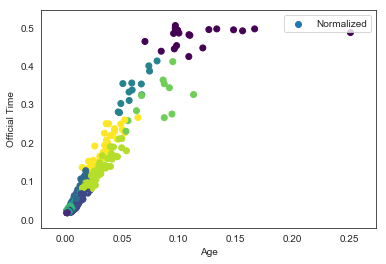

0.5630043185598147
              precision    recall  f1-score   support

           0       0.37      0.02      0.04       358
           1       1.00      0.10      0.18       599
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

   micro avg       0.07      0.07      0.07       957
   macro avg       0.14      0.01      0.02       957
weighted avg       0.76      0.07      0.12       957



In [17]:
km = KMeans(n_clusters = 10, random_state = seed).fit(X_norm)
km_labels = km.labels_
plt.scatter(X_norm['age'], X_norm['official'], c=km_labels, cmap='viridis', label = "Normalized")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Official Time")
plt.show()
print(metrics.silhouette_score(X_norm, km_labels, metric='euclidean'))
print(metrics.classification_report(y, km_labels))

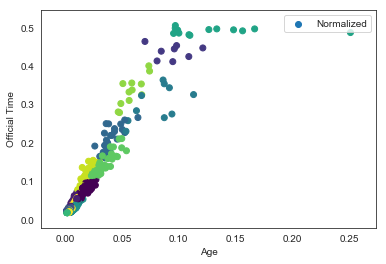

0.5723944314348945
              precision    recall  f1-score   support

           0       0.54      0.12      0.20       358
           1       0.58      0.09      0.16       599
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

   micro avg       0.10      0.10      0.10       957
   macro avg       0.09      0.02      0.03       957
weighted avg       0.57      0.10      0.17       957



In [52]:
# Repeat for PCA
km2 = KMeans(n_clusters = 13, random_state = seed).fit(X_pca)
km2_labels = km2.labels_
plt.scatter(X_norm['age'], X_norm['official'], c=km2_labels, cmap='viridis', label = "Normalized")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Official Time")
plt.show()
print(metrics.silhouette_score(X_pca, km2_labels, metric='euclidean'))
print(metrics.classification_report(y, km2_labels))

## Mean-shift

Number of estimated clusters: 27


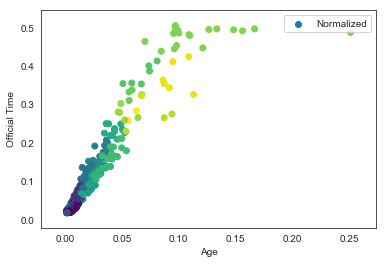

0.494614262889303
              precision    recall  f1-score   support

           0       0.27      0.20      0.23       358
           1       0.76      0.10      0.17       599
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
         

In [59]:
bandwidth = estimate_bandwidth(X_norm, random_state = seed, quantile=0.02)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_norm)

# Extract cluster assignments for each data point.
ms_labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
ms_n_clusters_ = len(np.unique(ms_labels))

print("Number of estimated clusters: {}".format(ms_n_clusters_))

plt.scatter(X_norm['age'], X_norm['official'], c=ms_labels, cmap='viridis', label = "Normalized")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Official Time")
plt.show()
print(metrics.silhouette_score(X_norm, ms_labels, metric='euclidean'))
print(metrics.classification_report(y, ms_labels))

Number of estimated clusters: 56


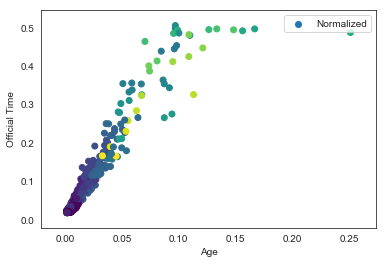

0.5233207772046105
              precision    recall  f1-score   support

           0       0.29      0.23      0.26       358
           1       0.76      0.10      0.18       599
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
        

In [64]:
bandwidth2 = estimate_bandwidth(X_pca, random_state = seed, quantile=0.021)

# Declare and fit the model.
ms2 = MeanShift(bandwidth=bandwidth2, bin_seeding=True)
ms2.fit(X_pca)

# Extract cluster assignments for each data point.
ms2_labels = ms2.labels_

# Coordinates of the cluster centers.
cluster_centers2 = ms2.cluster_centers_

# Count our clusters.
ms2_n_clusters_ = len(np.unique(ms2_labels))

print("Number of estimated clusters: {}".format(ms2_n_clusters_))

plt.scatter(X_norm['age'], X_norm['official'], c=ms2_labels, cmap='viridis', label = "Normalized")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Official Time")
plt.show()
print(metrics.silhouette_score(X_pca, ms2_labels, metric='euclidean'))
print(metrics.classification_report(y, ms2_labels))

## Spectral Clustering

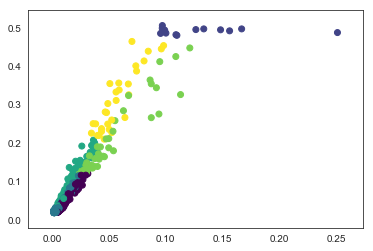

0.30968828850430913
              precision    recall  f1-score   support

           0       0.36      0.22      0.27       358
           1       0.62      0.01      0.03       599
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

   micro avg       0.09      0.09      0.09       957
   macro avg       0.16      0.04      0.05       957
weighted avg       0.52      0.09      0.12       957



In [71]:
n_clusters = 6

sc = SpectralClustering(n_clusters=n_clusters, random_state=seed)
sc.fit(X_norm)

sc_labels = sc.labels_
plt.scatter(X_norm['age'], X_norm['official'], c=sc_labels, cmap='viridis')
plt.show()

print(metrics.silhouette_score(X_norm, sc_labels, metric='euclidean'))
print(metrics.classification_report(y, sc_labels))

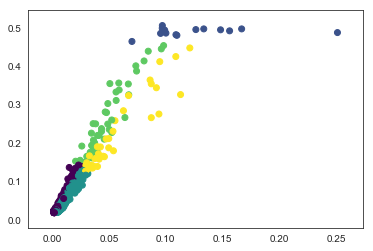

0.6534199126125925
              precision    recall  f1-score   support

           0       0.41      0.36      0.39       358
           1       0.57      0.01      0.03       599
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.14      0.14      0.14       957
   macro avg       0.20      0.07      0.08       957
weighted avg       0.51      0.14      0.16       957



In [80]:
n_clusters = 5

sc2 = SpectralClustering(n_clusters=n_clusters, random_state=seed)
sc2.fit(X_pca)

sc2_labels = sc2.labels_
plt.scatter(X_norm['age'], X_norm['official'], c=sc2_labels, cmap='viridis')
plt.show()

print(metrics.silhouette_score(X_pca, sc2_labels, metric='euclidean'))
print(metrics.classification_report(y, sc2_labels))

Model Fitting Status: Complete.
Estimated Number of Clusters: 568


## Affinity Propagation

In [87]:
af = AffinityPropagation().fit(X_norm)
print('Model Fitting Status: Complete.')

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
af_labels = af.labels_
print('Estimated Number of Clusters: {}'.format(n_clusters_))

Model Fitting Status: Complete.
Estimated Number of Clusters: 568


In [88]:
af2 = AffinityPropagation().fit(X_pca)
print('Model Fitting Status: Complete.')

cluster_centers_indices2 = af2.cluster_centers_indices_
n2_clusters_ = len(cluster_centers_indices2)
af2_labels = af2.labels_
print('Estimated Number of Clusters: {}'.format(n2_clusters_))

Model Fitting Status: Complete.
Estimated Number of Clusters: 530


# Evaluation: Silhouette Coefficients

In [89]:
ms_silhouette = metrics.silhouette_score(X_pca, ms_labels, metric='euclidean')
km_silhouette = metrics.silhouette_score(X_pca, km_labels, metric='euclidean')
sc_silhouette = metrics.silhouette_score(X_pca, sc_labels, metric='euclidean')
af_silhouette = metrics.silhouette_score(X_pca, af_labels, metric='euclidean')

In [90]:
print('Mean-Shift Silhouette Coefficient: {:.2}'.format(ms_silhouette))
print('K-Means Silhouette Coefficient: {:.2}'.format(km_silhouette))
print('Spectral Silhouette Coefficient: {:.2}'.format(sc_silhouette))
print('Affinity Propagation Silhouette Coefficient: {:.2}'.format(af_silhouette))

Mean-Shift Silhouette Coefficient: 0.5
K-Means Silhouette Coefficient: 0.56
Spectral Silhouette Coefficient: 0.31
Affinity Propagation Silhouette Coefficient: 0.18
